In [2]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\willh\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Below are the various lines of code to create the pivot table used in exercise 6

df_Canada = df[df['job_country'] == 'Canada'].copy()
# Using datetime to populate the new column with month name, then check results

df_Canada['job_posted_month'] = df_Canada['job_posted_date'].dt.strftime('%B')

df_Canada_pivot = df_Canada.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

# Create new column after resetting index in order to get a number associated with month to chronologically order for plotting
df_Canada_pivot.reset_index(inplace=True)
df_Canada_pivot['month_no'] = pd.to_datetime(df_Canada_pivot['job_posted_month'], format='%B').dt.month

df_Canada_pivot.sort_values('month_no').copy()

df_Canada_pivot.sort_values('month_no', inplace=True)
df_Canada_pivot.set_index('job_posted_month', inplace=True)
df_Canada_pivot.drop(columns='month_no', inplace=True)




In [4]:
df_Canada_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,136,26,286,945,257,55,68,251,83,118
February,72,24,148,506,133,34,28,170,45,106
March,75,26,155,533,138,68,32,163,60,105
April,138,30,179,513,167,53,30,173,45,127
May,61,9,160,549,108,42,24,148,35,65
June,89,10,183,491,116,44,28,168,45,66
July,92,25,208,501,169,43,45,153,58,75
August,118,24,183,374,164,58,56,124,66,116
September,82,15,209,304,131,39,38,101,35,94


In [5]:
df_can_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [7]:
# Merging Canada Data pivot table from exercise 6 with newly imported software pivot table

df_can_merged = df_Canada_pivot.merge(df_can_software_pivot, on='job_posted_month')

In [ ]:
# By placing parenthesis around the code with lots of appending you can break it into multiple lines
    # and it will run as though all together
top_5 = (df_can_merged  # Also allows comments for each line
         .sum()  # This adds each column in the merged pivot table
         .sort_values(ascending=False) # Sorting the output so it goes from most values to least
         .head(5)  # Selecting top 5 job titles by number of postings
         .index # Gets index
         .to_list()  # Converts to a list in python
         )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

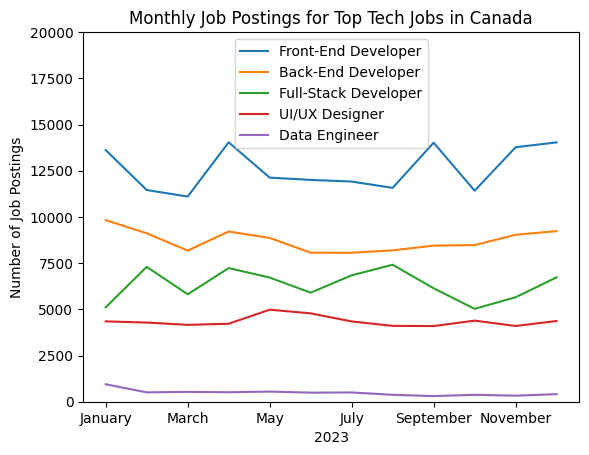

In [14]:

df_can_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in Canada')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.ylim(0, 20000)
plt.legend()
plt.show()